In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [4]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

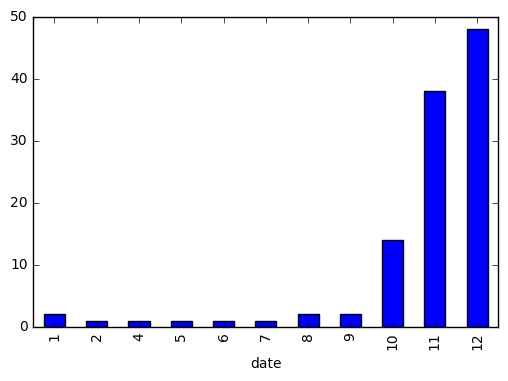

In [14]:
r=release_dates
r[(r.title.str.contains('Christmas')) & (r.country=='USA')].groupby(r.date.dt.month).size().plot(kind='bar')

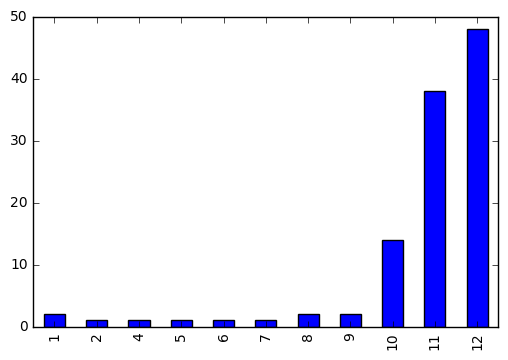

In [15]:
rd = release_dates
rd = rd[rd.title.str.contains('Christmas')]
rd = rd[rd.country == 'USA']
rd.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

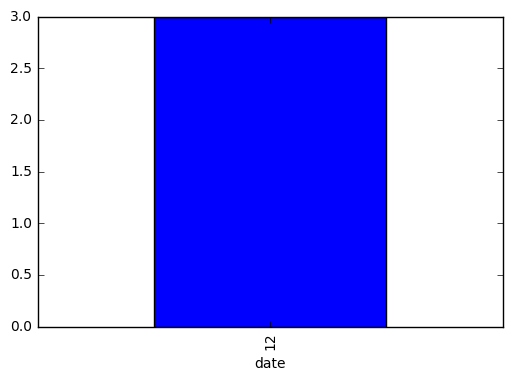

In [21]:
r=release_dates
r=r[(r.title.str.startswith('The Hobbit')) & (r.country=='USA')].groupby(r.date.dt.month).size()
r.plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

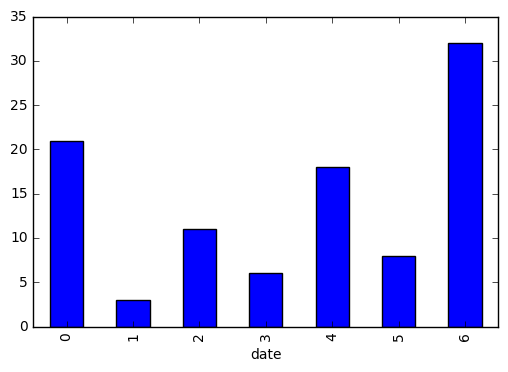

In [23]:
r=release_dates
r=r[(r.title.str.contains('Romance')) & (r.country=='USA')].groupby(r.date.dt.dayofweek).size()
r.plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

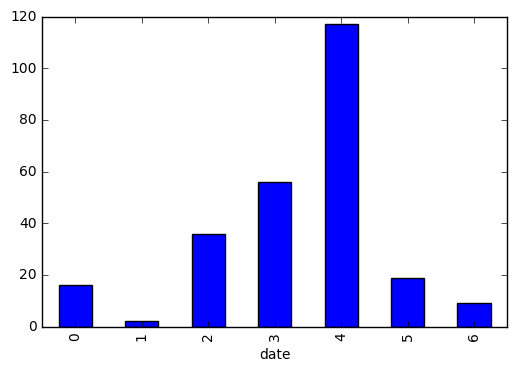

In [25]:
r=release_dates
r[r.title.str.contains('Action')].groupby(r.date.dt.dayofweek).size().plot(kind='bar')

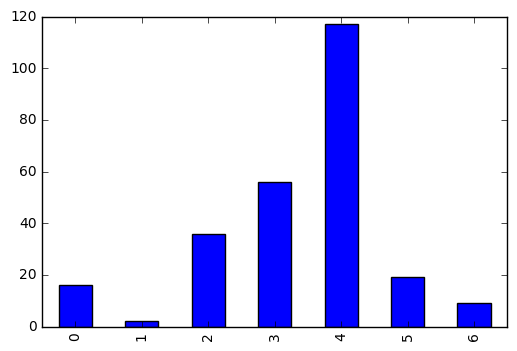

In [27]:
r[r.title.str.contains('Action')].date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [41]:
r=release_dates[release_dates.country=='USA']

c=cast[(cast.name=='Judi Dench') & (cast.year//10*10==1990)]

r.merge(c)

,title,year,country,date,name,type,character,n
0,GoldenEye,1995,USA,1995-11-17,Judi Dench,actress,M,6.0
1,Hamlet,1996,USA,1996-12-25,Judi Dench,actress,Hecuba,12.0
2,Jack & Sarah,1995,USA,1996-03-22,Judi Dench,actress,Margaret,3.0
3,Mrs Brown,1997,USA,1997-10-03,Judi Dench,actress,Queen Victoria,1.0
4,Shakespeare in Love,1998,USA,1999-01-08,Judi Dench,actress,Queen Elizabeth,12.0
5,Tea with Mussolini,1999,USA,1999-05-14,Judi Dench,actress,Arabella,2.0
6,The World Is Not Enough,1999,USA,1999-11-19,Judi Dench,actress,M,6.0
7,Tomorrow Never Dies,1997,USA,1997-12-19,Judi Dench,actress,M,9.0


### In which months do films with Judi Dench tend to be released in the USA?

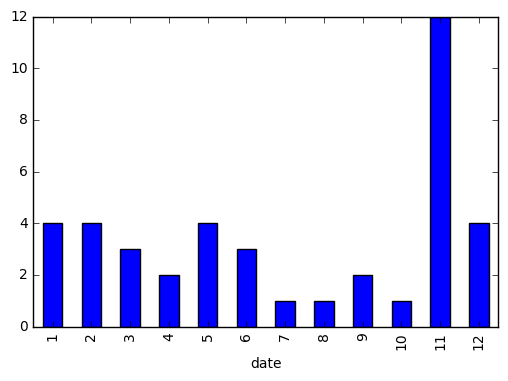

In [46]:
r=release_dates[release_dates.country=='USA']

c=cast[(cast.name=='Judi Dench')]

m=r.merge(c)
       
m.groupby(m.date.dt.month).size().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

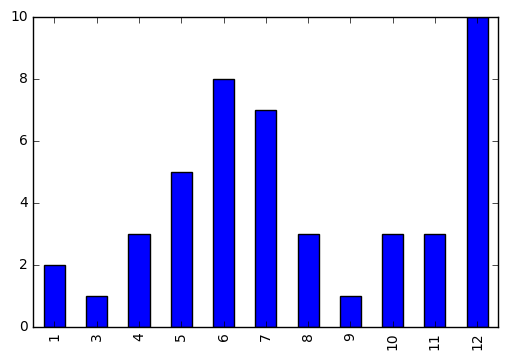

In [49]:
r=release_dates[release_dates.country=='USA']

c=cast[(cast.name=='Tom Cruise')]

m=r.merge(c)
       
m.date.dt.month.value_counts().sort_index().plot(kind='bar')